# Simple

В этой среде один агент видит ориентир (**landmark**), и его вознаграждение определяется тем, насколько близко он подбирается к ориентиру. 

In [1]:
from pettingzoo.mpe import simple_v3

env = simple_v3.env(max_cycles=150, render_mode="rgb_array")
env.reset()

action_space = env.action_space("agent_0")
observation_space = env.observation_space("agent_0")

print(f"{ env.agents = }")
print(f"{ action_space = }")
print(f"{ observation_space = }")

 env.agents = ['agent_0']
 action_space = Discrete(5)
 observation_space = Box(-inf, inf, (4,), float32)


## Observation space

Агент может наблюдать 4 значения: первая пара значений – его собственная скорость (`self_vel`), вторая пара значений – позиция ориентира относительно агента (`landmark_rel_position`).

In [2]:
observation = env.observe("agent_0")
self_vel, landmark_rel_position = observation[:2], observation[2:]
print(self_vel, landmark_rel_position)

[0. 0.] [0.66235304 1.3075571 ]


## Action Space

Дейстиве определяется единственным числом, задающим направление ускорения:

- 0 – без ускорения ;
- 1 – ускорение влево;
- 2 – ускорение вправо;
- 3 – ускорение вниз;
- 4 – ускорение вверх.

> При движении без ускорения скорость постепенно падает, а при постоянном ускорении вдоль одной из осей максимальная скорость ограничивается значением `2.0`.

In [3]:
action_space.sample()   # случайное значение действия

2

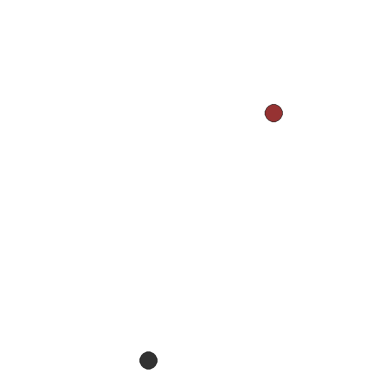

In [4]:
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(env.render())

In [5]:
env.step(1)
observation = env.observe("agent_0")
self_vel, landmark_rel_position = observation[:2], observation[2:]
print(self_vel, landmark_rel_position)

[-0.5  0. ] [0.66235304 1.3075571 ]


## Rewards

Вознаграждение на каждом шаге определяется отрицательным значением квадрата евклидова расстояния агента до ориентира:

In [6]:
print(env.rewards)
landmark_rel_position[0]**2 + landmark_rel_position[1]**2

{'agent_0': -2.1484170799002817}


2.148417133489829

## AEC API

Запустим Agent Environment Cycle ([AEC](https://pettingzoo.farama.org/api/aec/)) с хаотическими действиями. При запуске AEC действия агентов совершаются по очерди: в одной итерации совершается действие одного агента, на следующей итерации – действие второго агента и тд. Таким образом, агенты перебираются циклически.

Метод `last()` возвращает значения для текущего агента, соответствующие его последнему действию.

In [7]:
env = simple_v3.env(render_mode="human")
env.reset(seed=42)

for agent in env.agent_iter():
    observation, reward, termination, truncation, info = env.last()
    if termination or truncation:
        action = None
    else:
        action = env.action_space(agent).sample() # this is where you would insert your policy

    env.step(action)
env.close()

## Parallel API

Параллельный запуск позволяет произвести действия для всех агентов в одной итерации. Для этого во внутреннем цикле (dict comprehension) перебираются агенты, и для каждого агента выбирается действие из его action space. Сформированный таким образом словарь (agent: action) передается методу `step()`, который возвращает значения для всех агентов, после их действий.

In [8]:
parallel_env = simple_v3.parallel_env(render_mode="human")
observations, infos = parallel_env.reset(seed=42)

while parallel_env.agents:
    actions = {agent: parallel_env.action_space(agent).sample() for agent in parallel_env.agents}
    observations, rewards, terminations, truncations, infos = parallel_env.step(actions)
parallel_env.close()

In [3]:
import numpy as np

a, b = [0, 1, 2], [3, 4, 5]
np.concatenate([a, b])

array([0, 1, 2, 3, 4, 5])

In [9]:
observations

{'agent_0': array([-0.3225102 ,  0.5560585 ,  0.04027966, -0.6605974 ], dtype=float32)}

# Policy

In [22]:
def simple_plicy(observation):
    vx, vy, landmark_x, landmark_y = observation
    if landmark_x > 0:
        if vx < 1.0:
            return 2
    else:
        if vx > -1.0:
            return 1
    if landmark_y > 0:
        if vy < 1.0:
            return 4
    else:
        if vy > -1.0:
            return 3
    return 0        

In [24]:
parallel_env = simple_v3.parallel_env(max_cycles=100, render_mode="human")
observations, infos = parallel_env.reset(seed=42)

while parallel_env.agents:
    actions = {agent: simple_plicy(observations["agent_0"]) for agent in parallel_env.agents}
    observations, rewards, terminations, truncations, infos = parallel_env.step(actions)
    print(f"{rewards = }")
parallel_env.close()

rewards = defaultdict(<class 'int'>, {'agent_0': -0.2959244566672397})
rewards = defaultdict(<class 'int'>, {'agent_0': -0.28149608239615587})
rewards = defaultdict(<class 'int'>, {'agent_0': -0.2682776774217592})
rewards = defaultdict(<class 'int'>, {'agent_0': -0.27429682754487783})
rewards = defaultdict(<class 'int'>, {'agent_0': -0.24716026934606705})
rewards = defaultdict(<class 'int'>, {'agent_0': -0.2188993795700935})
rewards = defaultdict(<class 'int'>, {'agent_0': -0.18265843128535075})
rewards = defaultdict(<class 'int'>, {'agent_0': -0.14919996601383892})
rewards = defaultdict(<class 'int'>, {'agent_0': -0.1345340836969859})
rewards = defaultdict(<class 'int'>, {'agent_0': -0.10677982314343211})
rewards = defaultdict(<class 'int'>, {'agent_0': -0.08381686684974726})
rewards = defaultdict(<class 'int'>, {'agent_0': -0.05774538495623137})
rewards = defaultdict(<class 'int'>, {'agent_0': -0.038287698399676495})
rewards = defaultdict(<class 'int'>, {'agent_0': -0.040545827463840

In [20]:
parallel_env.agents

['agent_0']

In [13]:
import numpy as np

a, b = np.array([1, 2])
a, b

(1, 2)